In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.linear_model import LogisticRegression

In [5]:
df = pd.read_csv('../Data/titanic_preprocesamiento.csv')
df.head()

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton,Survived
0,22.0,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0,0.0
1,38.0,1.0,1.0,0.0,0.0,1.0,0.0,4.280593,0.0,0.0,1.0,1.0
2,26.0,3.0,1.0,1.0,0.0,1.0,0.0,2.188856,0.0,0.0,1.0,1.0
3,35.0,1.0,2.0,0.0,0.0,1.0,0.0,3.990834,0.0,0.0,1.0,1.0
4,35.0,3.0,1.0,0.0,0.0,0.0,1.0,2.202765,0.0,1.0,0.0,0.0


In [6]:
# Clasificación binaria
# 0 - No sobrevivió
# 1 - Sí sobrevivió
X = df.drop('Survived', axis=1)
X.head()

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton
0,22.0,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0
1,38.0,1.0,1.0,0.0,0.0,1.0,0.0,4.280593,0.0,0.0,1.0
2,26.0,3.0,1.0,1.0,0.0,1.0,0.0,2.188856,0.0,0.0,1.0
3,35.0,1.0,2.0,0.0,0.0,1.0,0.0,3.990834,0.0,0.0,1.0
4,35.0,3.0,1.0,0.0,0.0,0.0,1.0,2.202765,0.0,1.0,0.0


In [7]:
y = df['Survived']

In [8]:
df['Survived'].value_counts()

Survived
0.0    535
1.0    341
Name: count, dtype: int64

## Regresión logística

* Parte lineal: similar a regresión lineal. Combina linealmente las columnas del dataframe:

z = w0 + w1 * x1 + w2 * x2 + wn * xn

* w0: intercept
* wi: pesos que el modelo aprende

Parte logística (función sigmoide)

sigmoide(z) = 1 / (1 + e ^ -z)

Esto nos da un número entre 0 y 1 que sería la probabilidad de pertecener a la clase 0 o 1. 

P ( clase = 1 | X)

* Si la probabilidad es mayor a 0.5 entonces se clasifica como clase 1. 
* Si la probabilidad es mayor a 0.5 entonces se clasifica como clase 0. 

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# LogisticRegression es un algoritmo de clasificación
# https://the-algorithms.com/es/algorithm/logistic-regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=2000, C=0.2)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))

[[99 16]
 [13 48]]


In [25]:
model.classes_

array([0., 1.])

## Matriz de confusión

Convención práctica (scikit learn)

|                   | **Predicho: 0** | **Predicho: 1** |
|-------------------|-----------------|-----------------|
| **Real: 0**       | 98 (TN)         | 17 (FP)         |
| **Real: 1**       | 13 (FN)          | 48 (TP)         |

Convención teórica

|                   | **Predicho: 1** | **Predicho: 0** |
|-------------------|-----------------|-----------------|
| **Real: 1**       | **True Positive (TP)** | **False Negative (FN)** |
| **Real: 0**       | **False Positive (FP)** | **True Negative (TN)** |

Cuidado porque scikit no lo hace tal cuál la convención teórica, primero pone la clase negativa 0, mientras que la convención teórica pone primera la clase positiva 1.

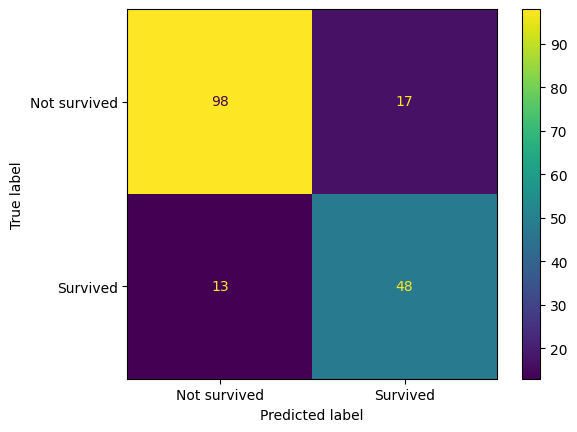

In [33]:
cm = confusion_matrix(y_test, y_pred)
# cmd = ConfusionMatrixDisplay(cm)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Not survived', 'Survived'])
cmd.plot();

In [76]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()
print('TN, FP, FN, TP:  ', TN, FP, FN, TP)

TN, FP, FN, TP:   99 16 13 48


In [ ]:
from sklearn.metrics import classification_report

# Para la clase 1 (survived) el modelo tiene peores puntuaciones
# support indica el número de registros filas, HAY QUE TENER EN CUENTA QUE HEMOS HECHO PARTICIONAMIENTO 20 %
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.85      0.87       115
         1.0       0.74      0.79      0.76        61

    accuracy                           0.83       176
   macro avg       0.81      0.82      0.81       176
weighted avg       0.83      0.83      0.83       176



### Accuracy: 

Exactitud: porcentaje de muestras que el modelo clasifica correctamente (TN + TP).

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

In [24]:
# exactitud, ratio de acierto
print(f'accuracy: {accuracy_score(y_test, y_pred)}')

accuracy: 0.8295454545454546


### Precision

Precisión: De todas las observaciones que el modelo predijo como positivos, ¿cuántos son realmente positivos?

Enfocada en evitar falsos positivos (FP).

Responde: "De los casos que predije como positivos, ¿qué proporción eran realmente positivos?"

Útil cuando los falsos positivos son costosos, como en detección de spam (es preferible no marcar un correo legítimo como spam).

$$
\text{Precision} = \frac{TP}{TP + FP}
$$

In [26]:
from sklearn.metrics import precision_score

precision_score(y_test, y_pred)

0.7384615384615385

### Recall

Enfocada en evitar falsos negativos (FN).

Responde: "De los casos positivos reales, ¿qué proporción detecté correctamente?"

Útil cuando los falsos negativos son costosos, como en detección de enfermedades (es mejor detectar todos los enfermos, incluso si algunos falsos positivos ocurren).

$$
\text{Recall} = \frac{TP}{TP + FN}
$$


In [27]:
from sklearn.metrics import recall_score

recall_score(y_test, y_pred)

0.7868852459016393

### f1-score

Media armónica de precision y recall, tiene en cuenta ambas métricas, proporciona un balance entre ambas.

Es la métrica más confiable cuando tenemos datasets desbalanceados.

$$
F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
$$

In [29]:
from sklearn.metrics import f1_score

f1_score(y_test, y_pred)

0.7619047619047619

## Especificidad

Specificity o Tasa de verdadero negativos

Mide qué proporción de los casos negativos reales fueron correctamente identificados. Complementa el recall, centrándose en los **negativos reales**.

$$
\text{Specificity} = \frac{TN}{TN + FP}
$$

In [70]:
# cuidado, no viene de scikit learn, se ha sacado de imblearn
from imblearn.metrics import specificity_score
specificity_score(y_test, y_pred)

np.float64(0.8608695652173913)

## Índice de Jaccard

Mide la similitud entre las predicciones positivas y los valores positivos reales.

$$
\text{Jaccard Index} = \frac{TP}{TP + FP + FN}
$$

Compara el tamaño de la intersección (predicciones correctas positivas) con la unión (predicciones positivas totales y reales).

In [71]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, y_pred)

np.float64(0.6233766233766234)

## ROC-AUC

Curva ilustrar el rendimiento del clasificador en distintos umbrales de decisión:

* TPR: True Positive ratio
* FPR: False Positive ratio

TPR = 1, FPR = 0, lo ideal

AUC: Area Under the curve cuantifica el área debajo de la curva ROC

* AUC = 1 perfecto
* AUC = 0.5 malo, igual que tomar una decisión aleatoria
* AUC < 0.5 peor que aleatorio, posible problema en el modelo

In [35]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, y_pred)
print(f'AUC {auc}')

AUC 0.8195295794725588


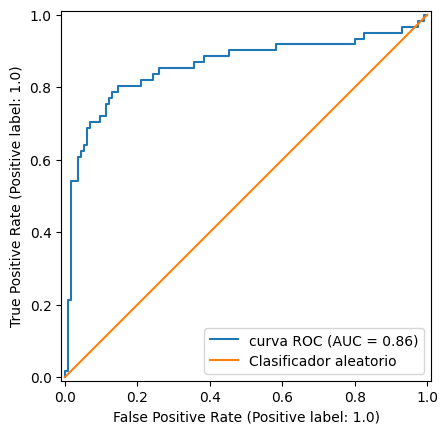

In [39]:
from sklearn.metrics import RocCurveDisplay

# Gráfico que muestra qué tan bien el modelo diferencia entre las clases 
# Eje x: FPR tasa de falsos positivos
# Eje y: TPR tasa de verdaderos positivos
# Nos interesa que la diagonalesté en (0,0)
# FPR si es 0 es ideal, cuanto mayor FPR peor y más curva se hace la línea
# TPR es 1 es ideal
# INTERPRETACIÓN cuanto más cerca de la esquina superior izquierda MEJOR
RocCurveDisplay.from_estimator(model, X_test, y_test, name='curva ROC')
plt.plot([0, 1], [0,1], label='Clasificador aleatorio')
plt.legend()

In [40]:
model.predict(X_test)

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1.])

In [41]:
model.predict_proba(X_test)

array([[0.29601929, 0.70398071],
       [0.86462451, 0.13537549],
       [0.69305801, 0.30694199],
       [0.88507228, 0.11492772],
       [0.83085271, 0.16914729],
       [0.09193106, 0.90806894],
       [0.85083728, 0.14916272],
       [0.58630052, 0.41369948],
       [0.90533345, 0.09466655],
       [0.54555842, 0.45444158],
       [0.40678809, 0.59321191],
       [0.37664393, 0.62335607],
       [0.75984866, 0.24015134],
       [0.57412056, 0.42587944],
       [0.77774733, 0.22225267],
       [0.42593744, 0.57406256],
       [0.53718927, 0.46281073],
       [0.58184253, 0.41815747],
       [0.29972861, 0.70027139],
       [0.12298767, 0.87701233],
       [0.84983654, 0.15016346],
       [0.87679291, 0.12320709],
       [0.80946713, 0.19053287],
       [0.33112606, 0.66887394],
       [0.92411016, 0.07588984],
       [0.90129921, 0.09870079],
       [0.8631818 , 0.1368182 ],
       [0.40560219, 0.59439781],
       [0.41977572, 0.58022428],
       [0.8734689 , 0.1265311 ],
       [0.

In [42]:
model.classes_

array([0., 1.])

In [44]:
# una nueva persona, por ejemplo "Pepe"
X_new = pd.DataFrame([[22.0, 3.0, 1.0, 1.0, 0.0, 0.0, 1.0, 2.110213, 1.0, 0.0, 0.0]], columns=X.columns)
X_new

,Age,Pclass,Ticket,Sibsp,Parch,Sex_female,Sex_male,Log_Fare,Embark_Town_Cherbourg,Embark_Town_Queenstown,Embark_Town_Southampton
0,22.0,3.0,1.0,1.0,0.0,0.0,1.0,2.110213,1.0,0.0,0.0


In [45]:
model.predict(X_new) # 0 no sobrevivió

array([0.])

In [46]:
# 87,5 % de probabilidad de que no haya sobrevivido
# 12,42 % de probabilidad de que sí haya sobrevivido
model.predict_proba(X_new) 

array([[0.87577564, 0.12422436]])

In [53]:
model.intercept_

array([3.17225264])

In [54]:
model.coef_

array([[-0.04794293, -1.01686266, -0.35620544, -0.11075366, -0.00186716,
         1.14580793, -1.1421609 ,  0.39581168, -0.10331367,  0.06525725,
        -0.11104905]])

## Comparar modelos clasificación

In [64]:
df_resultados = pd.DataFrame(columns=['Modelo', 'accuracy', 'precision', 'recall', 'f1', 'AUC'])

def calculate_metrics(name, model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    
    df_resultados.loc[len(df_resultados)] = [name, accuracy, precision, recall, f1, auc]

In [ ]:
model = LogisticRegression(max_iter=1000, C=1)
calculate_metrics('RLog', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.738462,0.786885,0.761905,0.81953


In [77]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
calculate_metrics('KNN k = 3', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237


In [78]:
model = KNeighborsClassifier(n_neighbors=5)
calculate_metrics('KNN k = 5', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869


Text(0.5, 0, 'k n_neighbors')

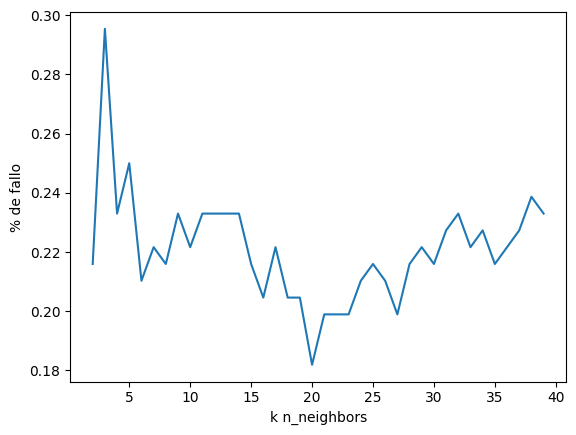

In [79]:
# elbow method o el método del codo
errors = []
for k in range(2, 40):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    error = 1 - accuracy
    errors.append(error)

plt.plot(range(2, 40), errors)
plt.ylabel('% de fallo')
plt.xlabel('k n_neighbors')

In [80]:
# por método del codo, n_neighbors = 20 es el mejor
model = KNeighborsClassifier(n_neighbors=20)
calculate_metrics('KNN k = 20', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496


## Árbol de decisión

Parámetros:

* criterion:
    * gini (por defecto)
        * Gini = 0 significa que el nodo es completamente puro, contiene datos de una sola clase.
        * Gini > 0 indica que hay mezcla de clases. Cuanto mayor sea el valor mayor será la impureza.
        * Gini es una medida de impureza o mezcla de clases en un nodo de un árbol. Propósito: evaluar qué tan puras son las divisiones en un nodo.
    * entropy: 
        * Entropy = 0 significa que el nodo es completamente puro, contiene datos de una sola clase.
        * Entropy > 0 indica que hay mezcla de clases. Cuanto mayor sea el valor, mayor será la impureza o la incertidumbre.
        * Entropy es una medida de incertidumbre o desorden en un nodo de un árbol.
        * Más lento, pero puede ser útil cuando las clases están desbalanceadas.
* max_depth
* min_samples_split: número de muestras que debe haber en un nodo antes de intentar dividirlo. Mínimo de muestras para dividir un nodo
* min_samples_split: Mínimo de muestras que debe haber en un nodo hijo
* max_features: número máximo de columnas X consideradas en cada división. Ideal si hay muchas columnas y algunas de ellas son irrelevantes.

    
Atributos:

* feature_importances_: importancia de cada columna en la X a la hora de hacer la partición, se calcula usando la impureza. 
* classes_
* tree_
* get_depth()

In [81]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
calculate_metrics('DT', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.829545,0.724638,0.819672,0.769231,0.827227


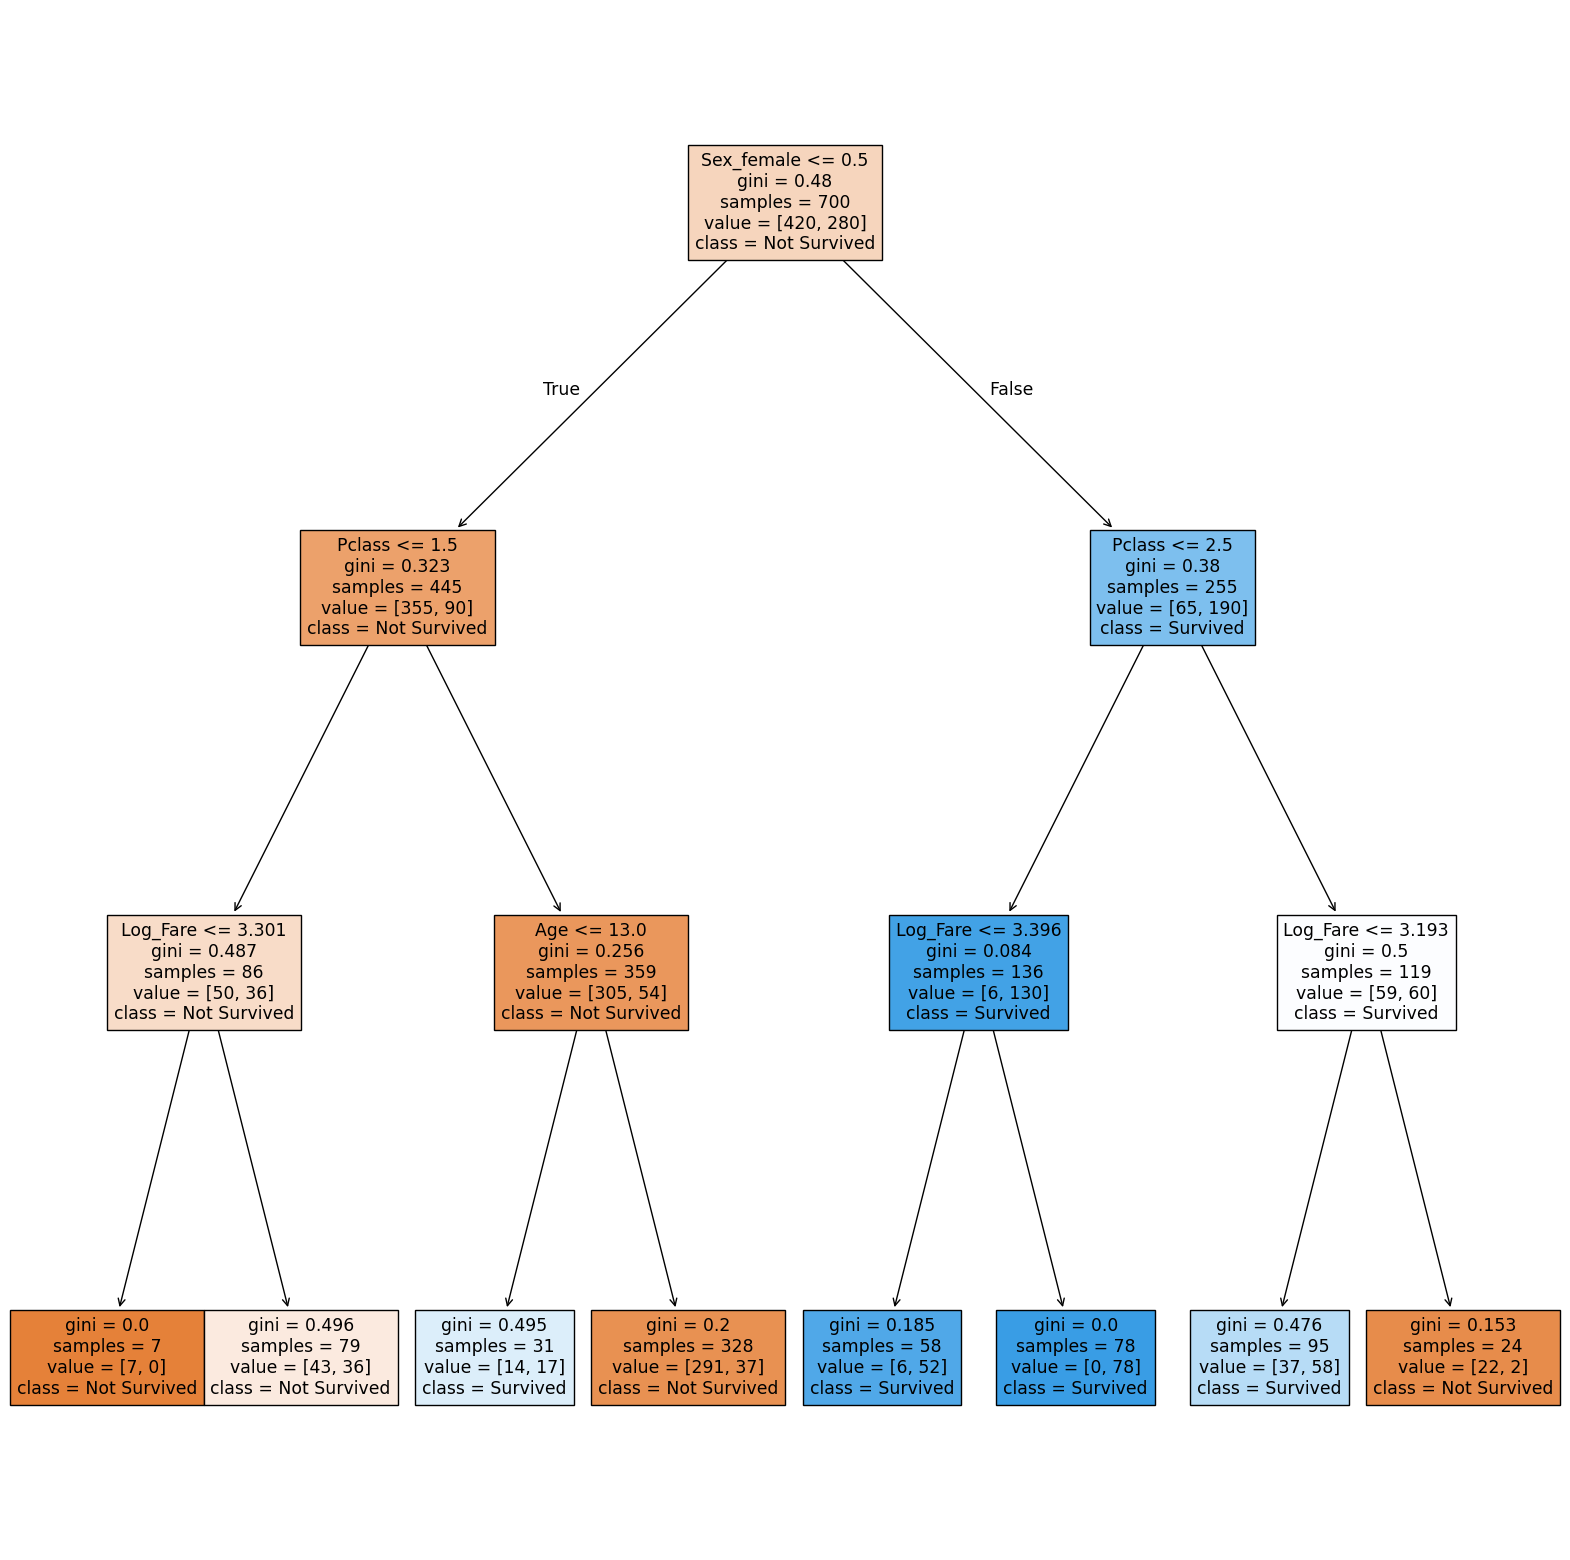

In [96]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 20))
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)
plot_tree(model, filled=True, class_names=['Not Survived', 'Survived'], feature_names=X.columns);

In [98]:
# un array con una importance por cada columna en X
for col, imp in zip(X.columns, model.feature_importances_):
    print(f"Columna: {col} Importancia: {imp}")

Columna: Age Importancia: 0.06880724888664776
Columna: Pclass Importancia: 0.22968529262971887
Columna: Ticket Importancia: 0.0
Columna: Sibsp Importancia: 0.0
Columna: Parch Importancia: 0.0
Columna: Sex_female Importancia: 0.6116683545505839
Columna: Sex_male Importancia: 0.0
Columna: Log_Fare Importancia: 0.08983910393304943
Columna: Embark_Town_Cherbourg Importancia: 0.0
Columna: Embark_Town_Queenstown Importancia: 0.0
Columna: Embark_Town_Southampton Importancia: 0.0


In [88]:
model = DecisionTreeClassifier(max_depth=10)
calculate_metrics('DT depth 10', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.829545,0.724638,0.819672,0.769231,0.827227
5,DT entropy,0.767045,0.638889,0.754098,0.691729,0.764006
6,DT depth 10,0.857955,0.800000,0.786885,0.793388,0.841269


In [99]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=200, min_samples_split=20)
calculate_metrics('RF 200', model)
df_resultados

,Modelo,accuracy,precision,recall,f1,AUC
0,RL,0.829545,0.738462,0.786885,0.761905,0.819530
1,KNN k = 3,0.704545,0.565217,0.639344,0.600000,0.689237
2,KNN k = 5,0.750000,0.634921,0.655738,0.645161,0.727869
3,KNN k = 20,0.818182,0.822222,0.606557,0.698113,0.768496
4,DT,0.829545,0.724638,0.819672,0.769231,0.827227
5,DT entropy,0.767045,0.638889,0.754098,0.691729,0.764006
6,DT depth 10,0.857955,0.800000,0.786885,0.793388,0.841269
7,RF depth 10,0.852273,0.786885,0.786885,0.786885,0.836921
8,RF,0.840909,0.753846,0.803279,0.777778,0.832074
9,RF 50,0.840909,0.753846,0.803279,0.777778,0.832074


In [100]:
for col, imp in zip(X.columns, model.feature_importances_):
    print(f"Columna: {col} Importancia: {imp}")

Columna: Age Importancia: 0.1426478715208496
Columna: Pclass Importancia: 0.1361310818391114
Columna: Ticket Importancia: 0.06624880974622262
Columna: Sibsp Importancia: 0.02304810406386875
Columna: Parch Importancia: 0.01821417583648963
Columna: Sex_female Importancia: 0.21458182645594492
Columna: Sex_male Importancia: 0.22512899802510047
Columna: Log_Fare Importancia: 0.14817494622588004
Columna: Embark_Town_Cherbourg Importancia: 0.006923846286855233
Columna: Embark_Town_Queenstown Importancia: 0.009807647281589591
Columna: Embark_Town_Southampton Importancia: 0.009092692718087745


In [ ]:
# clasificación multiclase